##Library


In [3]:
#Base
import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Train-Test Split
from sklearn.model_selection import train_test_split

#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#Cross Validation 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

#SMOTE
from imblearn.over_sampling import SMOTE, RandomOverSampler

##Preprocessing

In [4]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [5]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [6]:
#Mengubah kolom beberapa kolom int menjadi float
train[['length_of_service','avg_training_score']].astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [7]:
test[['length_of_service','avg_training_score']].astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


<AxesSubplot: xlabel='is_promoted', ylabel='count'>

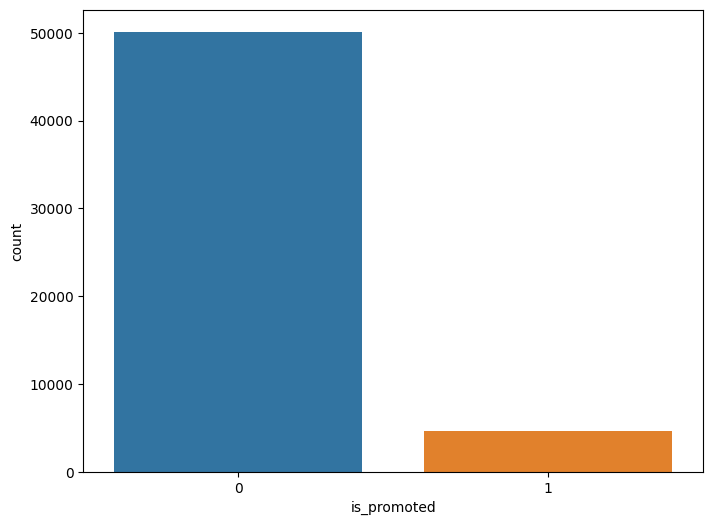

In [8]:
#Mengecek apakah data target imbalance atau tidak
plt.figure(figsize=(8,6))
sns.countplot(data= train, x= 'is_promoted')

##Heat Map

C:\Users\HP\AppData\Local\Temp\ipykernel_10616\1977122356.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().abs()
C:\Users\HP\AppData\Local\Temp\ipykernel_10616\1977122356.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot: >

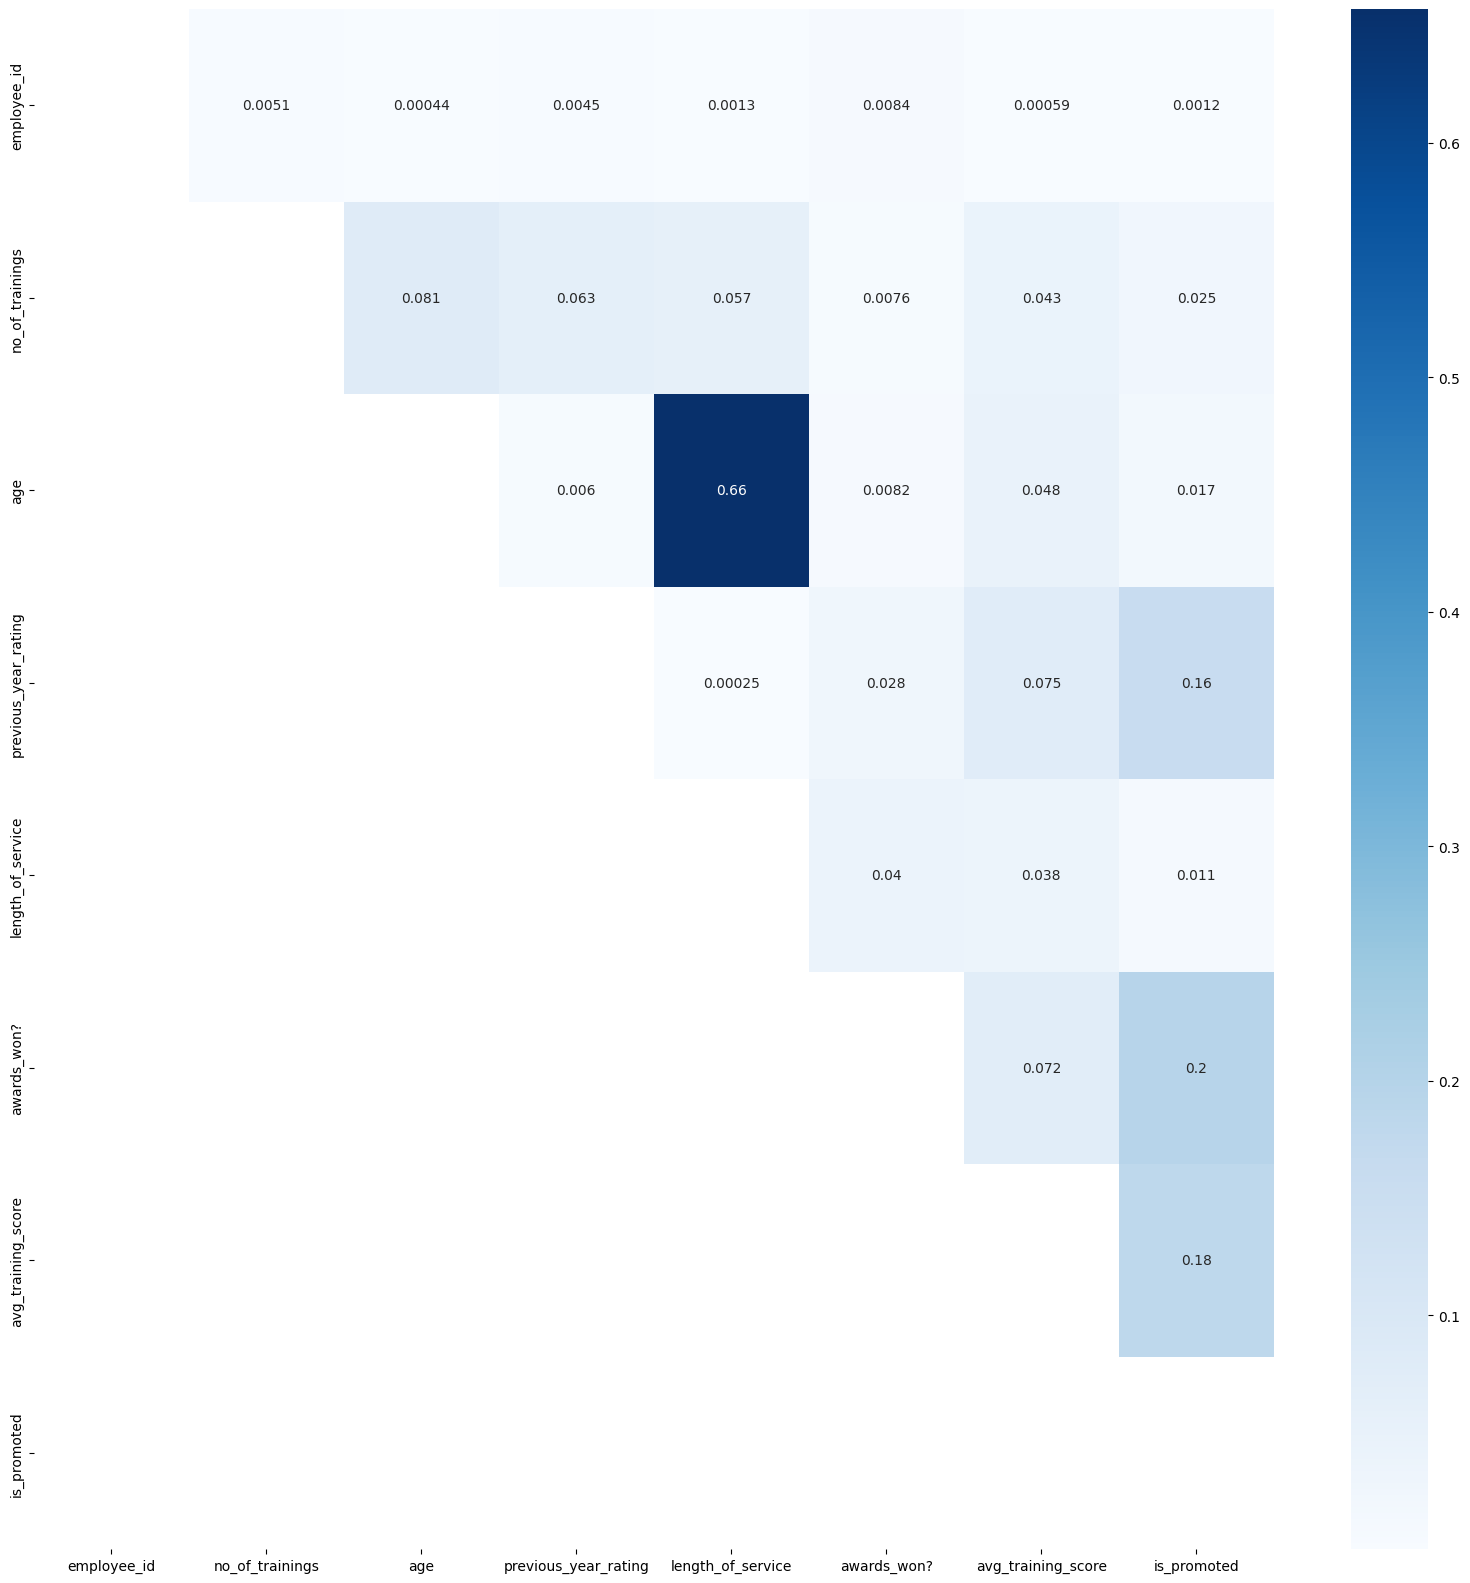

In [9]:
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')

C:\Users\HP\AppData\Local\Temp\ipykernel_10616\3253772197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<AxesSubplot: >

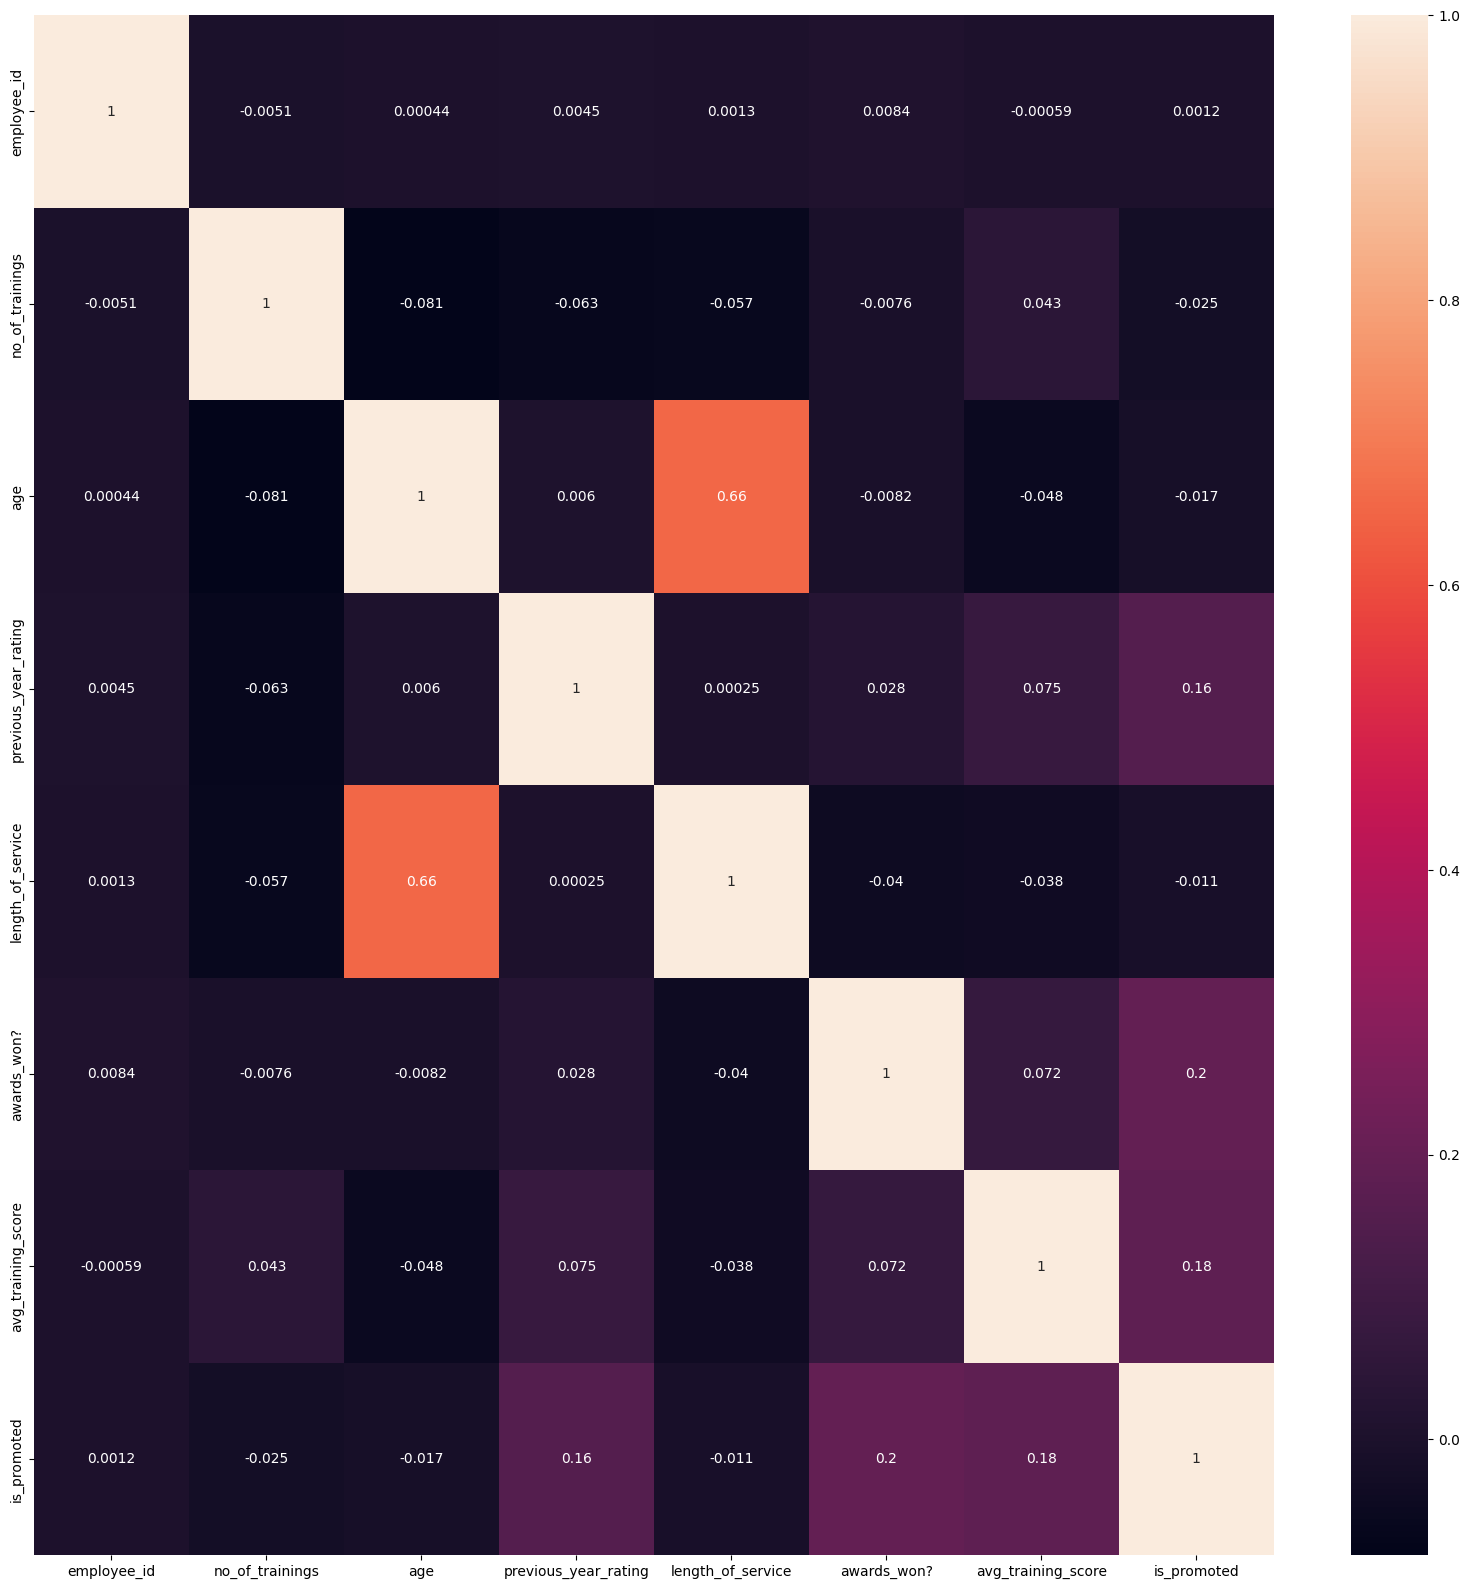

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

#Data Test Pre processing

In [11]:
#Mengecek Nilai nan disetiap kolom
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
#Men-drop kolom yang dianggap kurang penting
test.drop(['employee_id','region'],1,inplace=True)
test

C:\Users\HP\AppData\Local\Temp\ipykernel_10616\4219839546.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test.drop(['employee_id','region'],1,inplace=True)


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Technology,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,HR,Bachelor's,f,other,1,31,3.0,5,0,51
2,Sales & Marketing,Bachelor's,m,other,1,31,1.0,4,0,47
3,Procurement,Bachelor's,f,other,3,31,2.0,9,0,65
4,Finance,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...
23485,Legal,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,Technology,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,HR,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,Procurement,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [13]:
#Mengisi nilai nan di kolom previous_year_rating dengan median
test['previous_year_rating'].median()

3.0

In [14]:
test['education'].fillna('Other', inplace=True)
test['previous_year_rating'].fillna(3.000, inplace=True)
test['previous_year_rating']

0        3.0
1        3.0
2        1.0
3        2.0
4        4.0
        ... 
23485    3.0
23486    3.0
23487    4.0
23488    3.0
23489    5.0
Name: previous_year_rating, Length: 23490, dtype: float64

In [15]:
test.isna().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

##Label Encoding

In [16]:
#Label encoding terhadap kolom education
test['education'] = test['education'].replace({"Master's & above":3, "Bachelor's":2, 'Below Secondary':1, 'Other':0})
test['education']

0        2
1        2
2        2
3        2
4        2
        ..
23485    1
23486    2
23487    2
23488    2
23489    3
Name: education, Length: 23490, dtype: int64

In [17]:
#Label encoding terhadap kolom gender
test['gender'] = test['gender'].replace({'f':0, 'm':1})
test['gender']

0        1
1        0
2        1
3        0
4        1
        ..
23485    1
23486    1
23487    0
23488    1
23489    1
Name: gender, Length: 23490, dtype: int64

##One Hot Encoding 


In [18]:
#Label encoding terhadap kolom departement
ohe = OneHotEncoder(sparse=False)
feature_array=ohe.fit_transform(test[['department']])
feature_labels=ohe.categories_
ohe.categories_

[array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
        'R&D', 'Sales & Marketing', 'Technology'], dtype=object)]

In [19]:
np.array(feature_labels).ravel()

array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'], dtype=object)

In [20]:
feature=pd.DataFrame(feature_array, columns= feature_labels)
test= pd.concat([test, feature], axis=1)


In [21]:
test.drop('department', axis=1, inplace=True)
test

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,"(Analytics,)","(Finance,)","(HR,)","(Legal,)","(Operations,)","(Procurement,)","(R&D,)","(Sales & Marketing,)","(Technology,)"
0,2,1,sourcing,1,24,3.0,1,0,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,other,1,31,3.0,5,0,51,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,other,1,31,1.0,4,0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,other,3,31,2.0,9,0,65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,1,sourcing,1,30,4.0,7,0,61,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,1,sourcing,1,24,3.0,1,0,61,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23486,2,1,sourcing,1,31,3.0,7,0,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23487,2,0,sourcing,1,26,4.0,4,0,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23488,2,1,sourcing,3,27,3.0,1,0,70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
#Label encoding terhadap kolom recruitment channel
ohe = OneHotEncoder(sparse=False)
feature_array1=ohe.fit_transform(test[['recruitment_channel']])
feature_labels1=ohe.categories_
ohe.categories_

[array(['other', 'referred', 'sourcing'], dtype=object)]

In [23]:
np.array(feature_labels1).ravel()

array(['other', 'referred', 'sourcing'], dtype=object)

In [24]:
feature1=pd.DataFrame(feature_array1, columns= feature_labels1)
test= pd.concat([test, feature1], axis=1)

In [25]:
test.drop('recruitment_channel', axis=1, inplace=True)
test

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,"(Analytics,)","(Finance,)","(HR,)","(Legal,)","(Operations,)","(Procurement,)","(R&D,)","(Sales & Marketing,)","(Technology,)","(other,)","(referred,)","(sourcing,)"
0,2,1,1,24,3.0,1,0,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0,1,31,3.0,5,0,51,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,1,31,1.0,4,0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2,0,3,31,2.0,9,0,65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,1,1,30,4.0,7,0,61,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,1,1,24,3.0,1,0,61,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23486,2,1,1,31,3.0,7,0,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23487,2,0,1,26,4.0,4,0,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23488,2,1,3,27,3.0,1,0,70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#Data Train preprocessing

In [26]:
#Memisahkan kolom fitur dan target
y= train['is_promoted']
X= train.drop(['employee_id','region', 'is_promoted'],1)
X

C:\Users\HP\AppData\Local\Temp\ipykernel_10616\403363956.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= train.drop(['employee_id','region', 'is_promoted'],1)


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,0,49
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,60
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,50
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,50
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing,1,48,3.0,17,0,78
54804,Operations,Master's & above,f,other,1,37,2.0,6,0,56
54805,Analytics,Bachelor's,m,other,1,27,5.0,3,0,79
54806,Sales & Marketing,NaN,m,sourcing,1,29,1.0,2,0,45


In [27]:
#Check nilai nan
X.isna().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [28]:
#Mengisi nilai nan dengan "other"
X['education'].fillna('Other', inplace=True)

In [29]:
X['education'].unique()

array(["Master's & above", "Bachelor's", 'Other', 'Below Secondary'],
      dtype=object)

In [30]:
#Mengisi nilai Nan di previous_year_rating dengan median
X['previous_year_rating'].median()

3.0

In [31]:
X['previous_year_rating'].fillna(3.000, inplace=True)
X['previous_year_rating']

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [32]:
X.isna().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

##Label encoding train

In [33]:
#Label encoding pada kolom education
X['education'] = X['education'].replace({"Master's & above":3, "Bachelor's":2, 'Below Secondary':1, 'Other':0})
X['education']

0        3
1        2
2        2
3        2
4        2
        ..
54803    2
54804    3
54805    2
54806    0
54807    2
Name: education, Length: 54808, dtype: int64

In [34]:
#Label encoding pada kolom gender
X['gender'] = X['gender'].replace({'f':0, 'm':1})
X['gender']

0        0
1        1
2        1
3        1
4        1
        ..
54803    1
54804    0
54805    1
54806    1
54807    1
Name: gender, Length: 54808, dtype: int64

In [35]:
X['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

##Onehot encoding train

In [36]:
#Onehot encoding terhadap kolom departement
ohe = OneHotEncoder(sparse=False)
feature_array=ohe.fit_transform(X[['department']])
feature_labels=ohe.categories_
ohe.categories_

[array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
        'R&D', 'Sales & Marketing', 'Technology'], dtype=object)]

In [37]:
np.array(feature_labels).ravel()

array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'], dtype=object)

In [38]:
feature=pd.DataFrame(feature_array, columns= feature_labels)

In [39]:
X= pd.concat([X, feature], axis=1)

In [40]:
X.drop('department', axis=1, inplace=True)
X

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,"(Analytics,)","(Finance,)","(HR,)","(Legal,)","(Operations,)","(Procurement,)","(R&D,)","(Sales & Marketing,)","(Technology,)"
0,3,0,sourcing,1,35,5.0,8,0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,other,1,30,5.0,4,0,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1,sourcing,1,34,3.0,7,0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,1,other,2,39,1.0,10,0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,1,other,1,45,3.0,2,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,1,sourcing,1,48,3.0,17,0,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54804,3,0,other,1,37,2.0,6,0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
54805,2,1,other,1,27,5.0,3,0,79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54806,0,1,sourcing,1,29,1.0,2,0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
#Onehot encoding terhadap kolom recruitment_channel
feature_array1=ohe.fit_transform(X[['recruitment_channel']])
feature_labels1=ohe.categories_
ohe.categories_

[array(['other', 'referred', 'sourcing'], dtype=object)]

In [42]:
np.array(feature_labels1).ravel()

array(['other', 'referred', 'sourcing'], dtype=object)

In [43]:
feature1=pd.DataFrame(feature_array1, columns= feature_labels1)
X= pd.concat([X, feature1], axis=1)

In [44]:
X.drop('recruitment_channel', axis=1, inplace=True)
X

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,"(Analytics,)","(Finance,)","(HR,)","(Legal,)","(Operations,)","(Procurement,)","(R&D,)","(Sales & Marketing,)","(Technology,)","(other,)","(referred,)","(sourcing,)"
0,3,0,1,35,5.0,8,0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,30,5.0,4,0,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,1,34,3.0,7,0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,1,2,39,1.0,10,0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2,1,1,45,3.0,2,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,1,1,48,3.0,17,0,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
54804,3,0,1,37,2.0,6,0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54805,2,1,1,27,5.0,3,0,79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54806,0,1,1,29,1.0,2,0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##SMOTE

In [45]:
#SMOTE untuk menyeimbangkan data target yang imbalance
oversample = SMOTE(sampling_strategy= 'all')
X_train, y_train = oversample.fit_resample(X, y)
print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


X_train dataset shape:  (100280, 20)
y_train dataset shape:  (100280,)


In [46]:
gg=pd.DataFrame(y_train, columns= ['is_promoted'])
gg.value_counts()

is_promoted
0              50140
1              50140
dtype: int64

<AxesSubplot: xlabel='is_promoted', ylabel='count'>

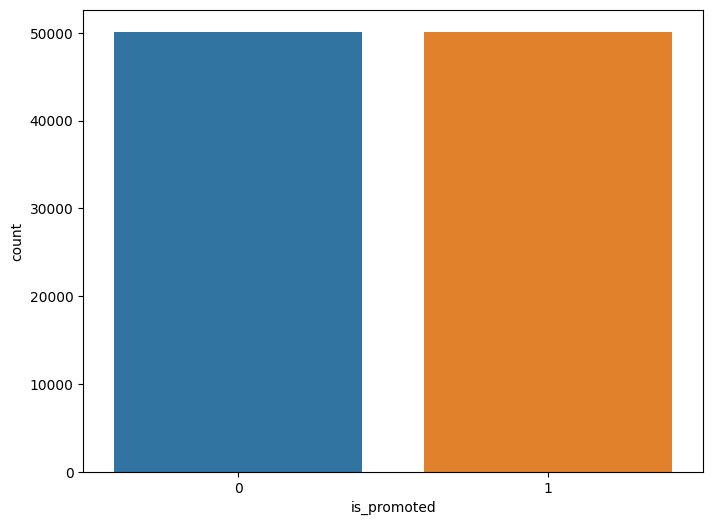

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(data= gg, x= 'is_promoted')

##Scaling

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test.columns)
print("X_train scaled shape: ", X_train_scaled.shape)
print("y_train  shape: ", y_train.shape)
print('X_test scaledshape', X_test_scaled.shape)

X_train scaled shape:  (100280, 20)
y_train  shape:  (100280,)
X_test scaledshape (23490, 20)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

##Modelling

In [49]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=42)

In [50]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


all_model = [DecisionTreeClassifier,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']

datatr = []
datasc = []
Recall =[]
Precision =[]


for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9901941231219252], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401], 1 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629], 1 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9901941231219252], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629], 2 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271], 2 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629], 2 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271, 0.9153185540243659], 2 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252], 3 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494], 3 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629], 3 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271, 0.9153185540243659], 3 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 3 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494, 0.9296968488232947], 3 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629, 0.9431981889277629], 3 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271, 0.9153185540243659, 0.9144054269752594], 3 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 4 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494, 0.9296968488232947], 4 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629, 0.9431981889277629], 4 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271, 0.9153185540243659, 0.9144054269752594], 4 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 4 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494, 0.9296968488232947, 0.929397686477862], 4 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629, 0.9431981889277629, 0.9419633669479317], 4 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271, 0.9153185540243659, 0.9144054269752594, 0.9148510893463921], 4 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 5 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494, 0.9296968488232947, 0.929397686477862], 5 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629, 0.9431981889277629, 0.9419633669479317], 5 of KFold 5
DecisionTreeClassifie

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 5 of KFold 5
DecisionTreeClassifier Acc Test: [0.9291982449142401, 0.9301954527323494, 0.9296968488232947, 0.929397686477862, 0.9282010370961309], 5 of KFold 5
DecisionTreeClassifier Recall: [0.9431981889277629, 0.9431981889277629, 0.9431981889277629, 0.9419633669479317, 0.9431981889277629], 5 of KFold 5
DecisionTreeClassifier Precission: [0.9134941199920271, 0.9153185540243659, 0.9144054269752594, 0.9148510893463921, 0.9116769444997016], 5 of KFold 5
---------------------------
----------FINAL------------
DecisionTreeClassifier Acc Train: 0.9901941231219252
DecisionTreeClassifier Acc Test: 0.9293378540087754
DecisionTreeClassifier Recall: 0.9429512245317966
DecisionTreeClassifier Precission: 0.9139492269675493
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [], 1 of KFold 5
RandomF

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


----------AFTER------------
RandomForestClassifier Acc Train: [0.9901719629481895], 1 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851], 1 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941], 1 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952], 1 of KFold 5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [0.9901719629481895], 2 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851], 2 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941], 2 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952], 2 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574], 2 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976], 2 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681], 2 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952, 0.9579937304075236], 2 of KFold 5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574], 3 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976], 3 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681], 3 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952, 0.9579937304075236], 3 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574, 0.9901830430350574], 3 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976, 0.9529317909852413], 3 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681, 0.9454620292241201], 3 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952, 0.9579937304075236, 0.956883982503645], 3 of KFold 5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574, 0.9901830430350574], 4 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976, 0.9529317909852413], 4 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681, 0.9454620292241201], 4 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952, 0.9579937304075236, 0.956883982503645], 4 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574, 0.9901830430350574, 0.9901719629481895], 4 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976, 0.9529317909852413, 0.9523334662943758], 4 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681, 0.9454620292241201, 0.9438155999176785], 4 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952, 0.9579937304075236, 0.956883982503645, 0.9572114381131288], 4 of KFold 5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574, 0.9901830430350574, 0.9901719629481895], 5 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976, 0.9529317909852413, 0.9523334662943758], 5 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681, 0.9454620292241201, 0.9438155999176785], 5 of KFold 5
RandomForestClassifi

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
RandomForestClassifier Acc Train: [0.9901719629481895, 0.9901830430350574, 0.9901830430350574, 0.9901719629481895, 0.9901719629481895], 5 of KFold 5
RandomForestClassifier Acc Test: [0.9533306741124851, 0.9525329078579976, 0.9529317909852413, 0.9523334662943758, 0.9518348623853211], 5 of KFold 5
RandomForestClassifier Recall: [0.9444330109075941, 0.9434039925910681, 0.9454620292241201, 0.9438155999176785, 0.9421691706112368], 5 of KFold 5
RandomForestClassifier Precission: [0.9586379778566952, 0.9579937304075236, 0.956883982503645, 0.9572114381131288, 0.9577405857740586], 5 of KFold 5
---------------------------
----------FINAL------------
RandomForestClassifier Acc Train: 0.9901763949829367
RandomForestClassifier Acc Test: 0.9525927403270842
RandomForestClassifier Recall: 0.9438567606503396
RandomForestClassifier Precission: 0.9576935429310103
---------------------------
----------BEFORE------------
GradientBoostingClassifier Acc Train: [], 1 of KFold 5
Gra

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
GradientBoostingClassifier Acc Train: [0.8838917697114745], 1 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673], 1 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138], 1 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576], 1 of KFold 5
---------------------------
----------BEFORE------------
GradientBoostingClassifier Acc Train: [0.8838917697114745], 2 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673], 2 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138], 2 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576], 2 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745], 2 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673], 2 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138], 2 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576, 0.9372632575757576], 2 of KFold 5
---------------------------
----------BEFORE------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745], 3 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673], 3 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138], 3 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576, 0.9372632575757576], 3 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745, 0.8838917697114745], 3 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673, 0.8838252891902673], 3 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138, 0.8147767030253138], 3 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576, 0.9372632575757576, 0.9372632575757576], 3 of KFold 5
---------------------------
----------BEFORE------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745, 0.8838917697114745], 4 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673, 0.8838252891902673], 4 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138, 0.8147767030253138], 4 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576, 0.9372632575757576, 0.9372632575757576], 4 of KFold 5
-----------------

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745, 0.8838917697114745, 0.8838917697114745], 4 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673, 0.8838252891902673, 0.8838252891902673], 4 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138, 0.8147767030253138, 0.8147767030253138], 4 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576, 0.9372632575757576, 0.9372632575757576, 0.9372632575757576], 4 of KFold 5
---------------------------
----------BEFORE------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745, 0.8838917697114745, 0.8838917697114745], 5 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673, 0.8838252891902673, 0.8838252891902673], 5 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138, 0.8147767030253138, 0.8147767030253138], 5 of

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
GradientBoostingClassifier Acc Train: [0.8838917697114745, 0.8838917697114745, 0.8838917697114745, 0.8838917697114745, 0.8838917697114745], 5 of KFold 5
GradientBoostingClassifier Acc Test: [0.8838252891902673, 0.8838252891902673, 0.8838252891902673, 0.8838252891902673, 0.8838252891902673], 5 of KFold 5
GradientBoostingClassifier Recall: [0.8147767030253138, 0.8147767030253138, 0.8147767030253138, 0.8147767030253138, 0.8147767030253138], 5 of KFold 5
GradientBoostingClassifier Precission: [0.9372632575757576, 0.9372632575757576, 0.9372632575757576, 0.9372632575757576, 0.9372632575757576], 5 of KFold 5
---------------------------
----------FINAL------------
GradientBoostingClassifier Acc Train: 0.8838917697114745
GradientBoostingClassifier Acc Test: 0.8838252891902674
GradientBoostingClassifier Recall: 0.8147767030253139
GradientBoostingClassifier Precission: 0.9372632575757576
---------------------------
----------BEFORE------------
ExtraTreesClassifier Acc 

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


----------AFTER------------
ExtraTreesClassifier Acc Train: [0.9901941231219252], 1 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964], 1 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807], 1 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845], 1 of KFold 5
---------------------------
----------BEFORE------------
ExtraTreesClassifier Acc Train: [0.9901941231219252], 2 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964], 2 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807], 2 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845], 2 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252], 2 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277], 2 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015], 2 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845, 0.9554995801847187], 2 of KFold 5
---------------------------
----------BEFORE------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252], 3 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277], 3 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015], 3 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845, 0.9554995801847187], 3 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 3 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277, 0.9487435181491823], 3 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015, 0.9362008643753859], 3 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845, 0.9554995801847187, 0.9570797391121397], 3 of KFold 5
---------------------------
----------BEFORE------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 4 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277, 0.9487435181491823], 4 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015, 0.9362008643753859], 4 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845, 0.9554995801847187, 0.9570797391121397], 4 of KFold 5
---------------------------


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 4 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277, 0.9487435181491823, 0.9479457518946949], 4 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015, 0.9362008643753859, 0.9370240790286067], 4 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845, 0.9554995801847187, 0.9570797391121397, 0.9547074858460893], 4 of KFold 5
---------------------------
----------BEFORE------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 5 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277, 0.9487435181491823, 0.9479457518946949], 5 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015, 0.9362008643753859, 0.9370240790286067], 5 of KFold 5
ExtraTreesClassifier Precission: 

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got featur

----------AFTER------------
ExtraTreesClassifier Acc Train: [0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252, 0.9901941231219252], 5 of KFold 5
ExtraTreesClassifier Acc Test: [0.9470482648583964, 0.9482449142401277, 0.9487435181491823, 0.9479457518946949, 0.9472477064220184], 5 of KFold 5
ExtraTreesClassifier Recall: [0.9359950607120807, 0.9368182753653015, 0.9362008643753859, 0.9370240790286067, 0.9355834533854702], 5 of KFold 5
ExtraTreesClassifier Precission: [0.9538590604026845, 0.9554995801847187, 0.9570797391121397, 0.9547074858460893, 0.9546409071818563], 5 of KFold 5
---------------------------
----------FINAL------------
ExtraTreesClassifier Acc Train: 0.9901941231219252
ExtraTreesClassifier Acc Test: 0.947846031112884
ExtraTreesClassifier Recall: 0.936324346573369
ExtraTreesClassifier Precission: 0.9551573545454977
---------------------------
----------BEFORE------------
XGBClassifier Acc Train: [], 1 of KFold 5
XGBClassifier Acc Test: [], 1 of 

##Result

In [51]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['/f1score']=data_hasil['Precision'] + data_hasil['Recall']
data_hasil['F1_Score']= 2 * data_hasil['Precision'] * data_hasil['Recall'] / data_hasil['/f1score']
#Sorted by Accuracy Test
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,/f1score,F1_Score
1,RandomForestClassifier,0.990176,0.952593,0.957694,0.943857,1.901550,0.950725
3,ExtraTreesClassifier,0.990194,0.947846,0.955157,0.936324,1.891482,0.945647
0,DecisionTreeClassifier,0.990194,0.929338,0.913949,0.942951,1.856900,0.928224
4,XGBClassifier,0.911969,0.904966,0.951665,0.846882,1.798547,0.896221
2,GradientBoostingClassifier,0.883892,0.883825,0.937263,0.814777,1.752040,0.871738


In [52]:
#Sorted by Precision
data_hasil.sort_values(by='Precision',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,/f1score,F1_Score
1,RandomForestClassifier,0.990176,0.952593,0.957694,0.943857,1.901550,0.950725
3,ExtraTreesClassifier,0.990194,0.947846,0.955157,0.936324,1.891482,0.945647
4,XGBClassifier,0.911969,0.904966,0.951665,0.846882,1.798547,0.896221
2,GradientBoostingClassifier,0.883892,0.883825,0.937263,0.814777,1.752040,0.871738
0,DecisionTreeClassifier,0.990194,0.929338,0.913949,0.942951,1.856900,0.928224


In [53]:
#Sorted by Recall
data_hasil.sort_values(by='Recall',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,/f1score,F1_Score
1,RandomForestClassifier,0.990176,0.952593,0.957694,0.943857,1.901550,0.950725
0,DecisionTreeClassifier,0.990194,0.929338,0.913949,0.942951,1.856900,0.928224
3,ExtraTreesClassifier,0.990194,0.947846,0.955157,0.936324,1.891482,0.945647
4,XGBClassifier,0.911969,0.904966,0.951665,0.846882,1.798547,0.896221
2,GradientBoostingClassifier,0.883892,0.883825,0.937263,0.814777,1.752040,0.871738


In [54]:
#Sorted by F1 Score
data_hasil.sort_values(by='F1_Score',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,/f1score,F1_Score
1,RandomForestClassifier,0.990176,0.952593,0.957694,0.943857,1.901550,0.950725
3,ExtraTreesClassifier,0.990194,0.947846,0.955157,0.936324,1.891482,0.945647
0,DecisionTreeClassifier,0.990194,0.929338,0.913949,0.942951,1.856900,0.928224
4,XGBClassifier,0.911969,0.904966,0.951665,0.846882,1.798547,0.896221
2,GradientBoostingClassifier,0.883892,0.883825,0.937263,0.814777,1.752040,0.871738


##Confusion Matrix

In [55]:
# Melatih Model
model=RandomForestClassifier().fit(X_train,y_train)
# Test Model
y_pred_train=model.predict(X_train)
print(classification_report(y_train,y_pred_train))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44971
           1       0.99      0.99      0.99     45281

    accuracy                           0.99     90252
   macro avg       0.99      0.99      0.99     90252
weighted avg       0.99      0.99      0.99     90252



Confusion Matrix: [[44375   291]
 [  596 44990]]


<AxesSubplot: >

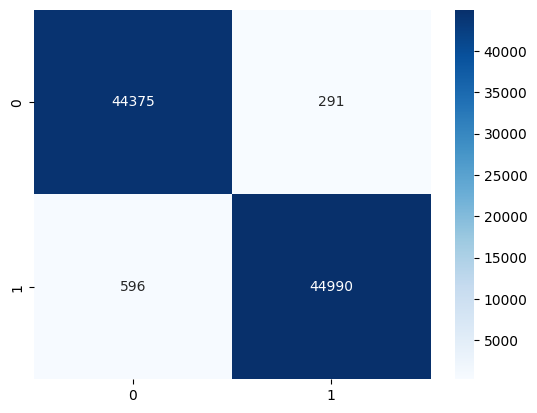

In [56]:
#Confusion Matrix train
cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: {}'.format(cm_train))
sns.heatmap(cm_train, annot=True, cmap="Blues", fmt='.7g')

In [57]:
model=RandomForestClassifier().fit(X_train,y_train)

y_pred_test=model.predict(X_test)
print(classification_report(y_test,y_pred_test))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5169
           1       0.96      0.94      0.95      4859

    accuracy                           0.95     10028
   macro avg       0.95      0.95      0.95     10028
weighted avg       0.95      0.95      0.95     10028



Confusion Matrix: [[4957  274]
 [ 212 4585]]


<AxesSubplot: >

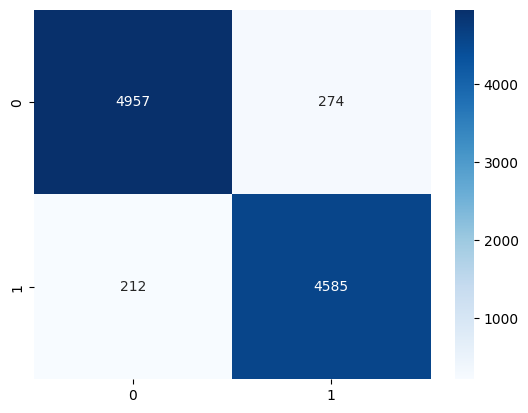

In [58]:
#Confusion Matrix test
cm_train = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_train))
sns.heatmap(cm_train, annot=True, cmap="Blues", fmt='.7g')